In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.interpolate import splrep, BSpline
from temporal_entropy import spline_grid_search, sliding_window_grid_search, gen_seq, gen_sliding_window, time_variance

In [34]:
def get_val(t):
    if t<50:
        return 0.1
    elif 50<=t<100:
        return 0.5
    else:
        return 0.9
    
T = 150
t_del = 0.1
N_parallel_sims = 10

  0%|          | 0/22 [00:00<?, ?it/s]

<AxesSubplot:xlabel='m', ylabel='SS_res'>

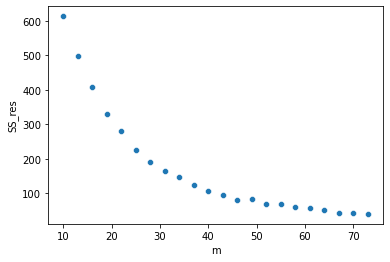

In [35]:
df = sliding_window_grid_search(T,t_del, N_parallel_sims,get_val)

sns.scatterplot(data = df, x='m', y='SS_res') 

In [36]:
m_best = 36 # CHOOSE BEST m

In [37]:
df_spline = spline_grid_search(m_best,T,t_del,get_val, N_parallel_sims, s_grid = np.arange(0,20), k_grid = np.arange(1,6))

<AxesSubplot:xlabel='s', ylabel='SS_res'>

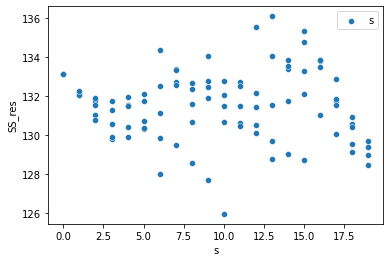

In [38]:
sns.scatterplot(data = df_spline, x='s', y='SS_res', label = 's')

<AxesSubplot:xlabel='k', ylabel='SS_res'>

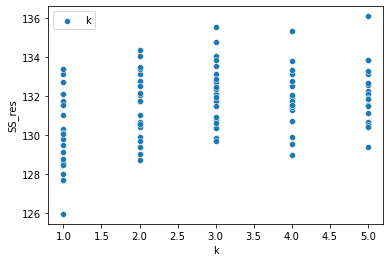

In [39]:
sns.scatterplot(data = df_spline, x='k', y='SS_res', label = 'k')

In [40]:
x, seq = gen_seq(T,t_del,time_variance, get_val, N_parallel_sims)
y_fit, _ = gen_sliding_window(10, seq, N_parallel_sims)

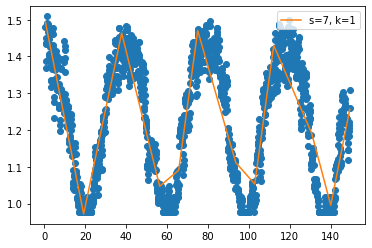

In [64]:
s_= 7 # want ot max s and min k
k_ = 1

cut=5
x_plot = x[cut:-cut]
y_fit_plot = y_fit[cut:-cut]
tck = splrep(x_plot, y_fit_plot, s=s_,k=k_)
plt.plot(x_plot, y_fit_plot, 'o')
plt.plot(x_plot, BSpline(*tck)(x_plot), '-', label=f's={s_}, k={k_}')
plt.legend()
plt.show()

# try with variety of functions

In [51]:
def get_val(t):
    return (np.sin((0.5*t)/(2*np.pi))+1)/2
    
T = 150
t_del = 0.1
N_parallel_sims = 10

  0%|          | 0/22 [00:00<?, ?it/s]

<AxesSubplot:xlabel='m', ylabel='SS_res'>

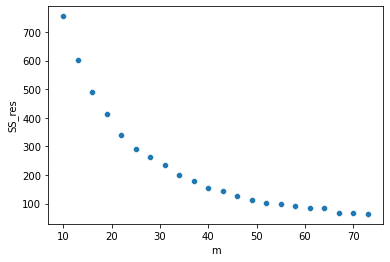

In [43]:
df = sliding_window_grid_search(T,t_del, N_parallel_sims,get_val)

sns.scatterplot(data = df, x='m', y='SS_res') 

In [52]:
m_best = 50 # CHOOSE BEST m

In [53]:
df_spline = spline_grid_search(m_best,T,t_del,get_val, N_parallel_sims, s_grid = np.arange(0,20), k_grid = np.arange(1,6))

<AxesSubplot:xlabel='s', ylabel='SS_res'>

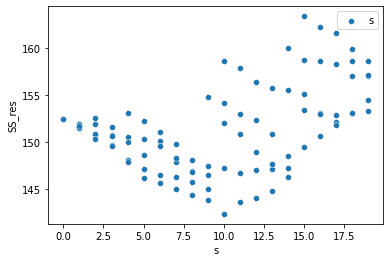

In [54]:
sns.scatterplot(data = df_spline, x='s', y='SS_res', label = 's')

<AxesSubplot:xlabel='k', ylabel='SS_res'>

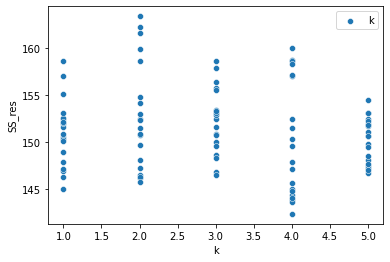

In [55]:
sns.scatterplot(data = df_spline, x='k', y='SS_res', label = 'k')

In [56]:
x, seq = gen_seq(T,t_del,time_variance, get_val, N_parallel_sims)
y_fit, _ = gen_sliding_window(10, seq, N_parallel_sims)

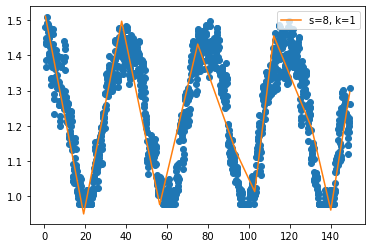

In [57]:
s_= 8
k_ = 1

cut=5
x_plot = x[cut:-cut]
y_fit_plot = y_fit[cut:-cut]
tck = splrep(x_plot, y_fit_plot, s=s_,k=k_)
plt.plot(x_plot, y_fit_plot, 'o')
plt.plot(x_plot, BSpline(*tck)(x_plot), '-', label=f's={s_}, k={k_}')
plt.legend()
plt.show()